In [ ]:
################################################################################
###########              MODELO CHURN O DE FUGA             ####################
################################################################################


####  1) FASE DE PREPARACION   ####
# 1.1) Carga de paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix,accuracy_score)

# Para trabajar con Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 1.2) Carga de datos
# r'/content/gdrive/My Drive/Colab Notebooks/Churn Model/ Ruta en Colab
inpath = '/content/gdrive/My Drive/Colab Notebooks/Churn Model/'
outpath = '/content/gdrive/My Drive/Colab Notebooks/Churn Model/'


# Las bases ya estan separadas en entrenamiento y testeo, conteniendo train el 85% del total de datos,
# ademas, solo la base train tiene el campo dependiente 'churn', el cual indica si un cliente tiene riesgo de fuga o no
train= pd.read_csv(inpath + 'train.csv')
test= pd.read_csv(inpath + 'test.csv')

In [ ]:
# 1.3) Exploracion de datos

# Primeros registros de la base de entrenamiento
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
# dimensiones de la base de entrenamiento
train.shape

(4250, 20)

In [ ]:
# Validamos numero de nulos por campo
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
test.head()

In [ ]:
test.shape

(750, 20)

In [ ]:
test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
# Validamos estructura de la base de entrenamiento
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
# 1.4) Transformaciones de las bases

# state es un campo tipo objeto, lo pasamos a tipo categoria
train['state']=train['state'].astype('category')
test['state']=test['state'].astype('category')

In [ ]:
# Validamos el cambio
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          4250 non-null   category
 1   account_length                 4250 non-null   int64   
 2   area_code                      4250 non-null   object  
 3   international_plan             4250 non-null   object  
 4   voice_mail_plan                4250 non-null   object  
 5   number_vmail_messages          4250 non-null   int64   
 6   total_day_minutes              4250 non-null   float64 
 7   total_day_calls                4250 non-null   int64   
 8   total_day_charge               4250 non-null   float64 
 9   total_eve_minutes              4250 non-null   float64 
 10  total_eve_calls                4250 non-null   int64   
 11  total_eve_charge               4250 non-null   float64 
 12  total_night_minutes            425

In [ ]:
# lo mismo para el campo area_code
train.area_code= train.area_code.astype('category')
test.area_code= test.area_code.astype('category')

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
# en un diccionario guardamos la nueva categorizacion de campos binarios como international_plan o voice_mail_plan,
# pasando los yes a 1 y los no a 0 en ambas bases
yes_binary= {'yes':'1','no': '0'}

train['international_plan']=train['international_plan'].map(yes_binary).astype('int64')
test['international_plan']=test['international_plan'].map(yes_binary).astype('int64')
train['voice_mail_plan']=train['voice_mail_plan'].map(yes_binary).astype('int64')
test['voice_mail_plan']=test['voice_mail_plan'].map(yes_binary).astype('int64')


In [ ]:
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
# Hacemos lo mismo para el campo dependiente churn
train['churn']=train['churn'].map(yes_binary).astype('int64')


In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


<AxesSubplot:xlabel='churn', ylabel='count'>

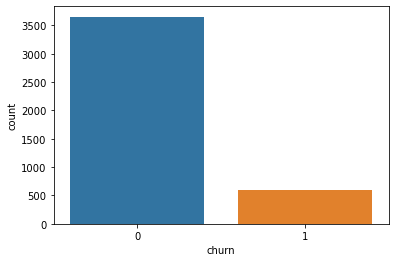

In [ ]:
####  2) FASE DESCRIPTIVA   ####
# 1.5) Visualizacion

sns.countplot(x='churn',data= train)

<AxesSubplot:xlabel='churn', ylabel='total_day_minutes'>

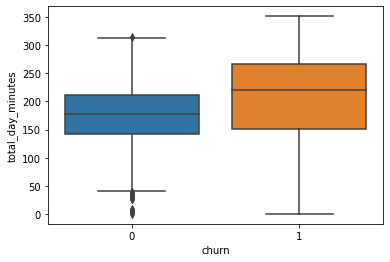

In [ ]:
sns.boxplot(x='churn',y= 'total_day_minutes',data= train)

<AxesSubplot:xlabel='churn', ylabel='total_eve_minutes'>

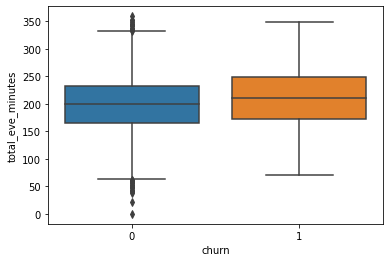

In [ ]:
sns.boxplot(x='churn',y= 'total_eve_minutes',data= train)

In [ ]:
# Hacemos el conteo de fugados (churned) por estado y calculamos tasa de fuga 
churn_rate= train.groupby('state').agg(total= ('churn','size'),churned= ('churn','sum')).reset_index()

In [ ]:
churn_rate['rate']= churn_rate['churned']/churn_rate['total']

In [ ]:
churn_rate.sort_values(by='rate',ascending=False)

,state,total,churned,rate
31,NJ,96,26,0.270833
4,CA,39,10,0.256410
47,WA,80,18,0.225000
20,MD,86,19,0.220930
26,MT,80,17,0.212500
36,OK,78,16,0.205128
33,NV,83,17,0.204819
40,SC,72,14,0.194444
43,TX,98,19,0.193878
25,MS,82,15,0.182927


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


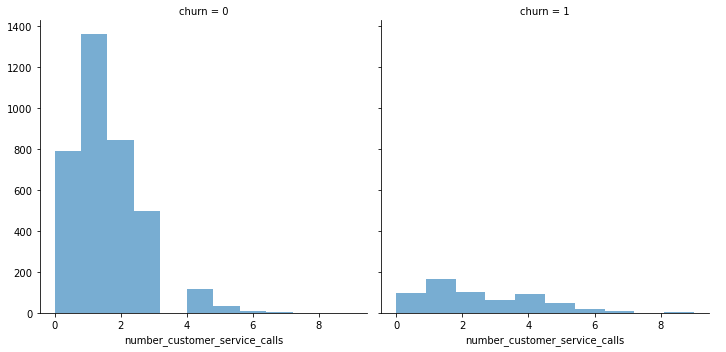

In [ ]:
p= sns.FacetGrid(train,col='churn',size=5)
p.map(plt.hist,'number_customer_service_calls',alpha=0.6)
p.add_legend()
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


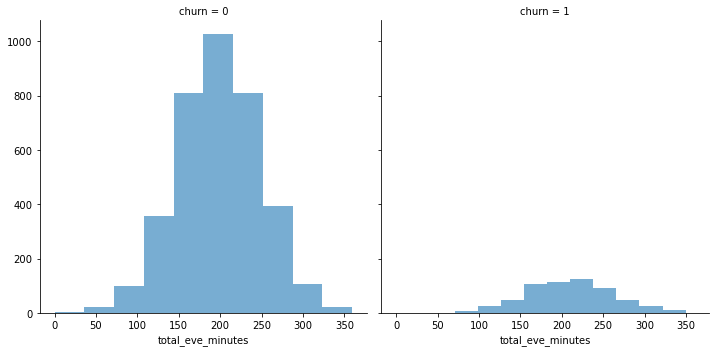

In [ ]:
p= sns.FacetGrid(train,col='churn',size=5)
p.map(plt.hist,'total_eve_minutes',alpha=0.6)
p.add_legend()
plt.show()

In [ ]:
train.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,0.027050,0.001663,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
international_plan,0.027050,1.000000,0.000714,0.004808,0.040059,0.009776,0.040061,0.023484,-0.003004,0.023479,-0.020694,0.007153,-0.020694,0.023815,0.006956,0.023799,-0.008881,0.259053
voice_mail_plan,0.001663,0.000714,1.000000,0.954014,-0.000653,-0.010004,-0.000658,0.011982,0.000263,0.011989,0.017884,0.007872,0.017875,0.008098,-0.005674,0.008129,-0.021504,-0.114643
number_vmail_messages,-0.006626,0.004808,0.954014,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,-0.001612,0.040059,-0.000653,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,0.023002,0.009776,-0.010004,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,-0.001613,0.040061,-0.000658,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,-0.010326,0.023484,0.011982,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855
total_eve_calls,0.005535,-0.003004,0.000263,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006817
total_eve_charge,-0.010322,0.023479,0.011989,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071,0.078852


In [ ]:
train['state']=train['state'].astype('category')

In [ ]:
train_dummies= pd.get_dummies(train)

In [ ]:
train_dummies.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn',
       'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX',

In [ ]:
shuffled= train_dummies.sample(frac=1).reset_index().drop('index',axis=1)

In [ ]:
shuffled

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,61,0,0,0,197.3,67,33.54,264.5,106,22.48,...,0,0,0,0,0,0,0,0,1,0
1,94,0,0,0,190.4,91,32.37,92.0,107,7.82,...,0,0,0,0,0,0,0,0,1,0
2,122,0,1,33,270.8,96,46.04,220.4,110,18.73,...,0,0,0,0,0,0,0,0,0,1
3,95,0,0,0,157.9,103,26.84,259.6,90,22.07,...,1,0,0,0,0,0,0,0,1,0
4,98,0,0,0,227.1,116,38.61,120.5,103,10.24,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,138,0,0,0,54.8,123,9.32,147.5,76,12.54,...,0,0,0,0,0,0,0,0,0,1
4246,53,0,1,22,174.8,110,29.72,191.4,104,16.27,...,0,0,0,0,0,0,0,0,0,1
4247,200,1,1,29,92.2,95,15.67,200.0,101,17.00,...,0,0,0,0,0,0,0,0,1,0
4248,127,1,0,0,176.9,110,30.07,167.9,100,14.27,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_x= shuffled.loc[0:3850,:].drop('churn',axis=1)
test_x= shuffled.loc[3851:,:].drop('churn',axis=1)
train_y= shuffled.loc[0:3850,'churn']
test_y= shuffled.loc[3851:,'churn']

In [ ]:
test_y

3851    0
3852    1
3853    0
3854    1
3855    0
       ..
4245    0
4246    1
4247    0
4248    0
4249    0
Name: churn, Length: 399, dtype: int64

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
import statsmodels.api as sm


In [ ]:
model_logit= sm.Logit(train_y,sm.add_constant(train_x)).fit()

Optimization terminated successfully.
         Current function value: 0.297673
         Iterations 8


In [ ]:
print(model_logit.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3851
Model:                          Logit   Df Residuals:                     3781
Method:                           MLE   Df Model:                           69
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                  0.2631
Time:                        15:11:13   Log-Likelihood:                -1146.3
converged:                       True   LL-Null:                       -1555.6
Covariance Type:            nonrobust   LLR p-value:                1.219e-128
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -6.4191        nan        nan        nan         nan         nan
account_length                    0.0012      0.001      0.847      0.397 

In [ ]:
yhat= model_logit.predict(sm.add_constant(test_x))

In [ ]:
yhat

3851    0.080315
3852    0.197715
3853    0.004672
3854    0.235928
3855    0.029176
          ...   
4245    0.013368
4246    0.042533
4247    0.020767
4248    0.372023
4249    0.149419
Length: 399, dtype: float64

In [ ]:
y_all= list(map(round,yhat))

In [ ]:
y_all

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
from sklearn.metrics import (confusion_matrix,accuracy_score)

In [ ]:
confusion_matrix(test_y,y_all)

array([[333,   5],
       [ 47,  14]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(test_y,y_all).ravel()

In [ ]:
(tn, fp, fn, tp)

(333, 5, 47, 14)

In [ ]:
accuracy_score(test_y,y_all)

0.8696741854636592

In [ ]:
(334+12)/400

0.865

In [ ]:
train_x.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'state_AK',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_U

In [ ]:
model_without_states= sm.Logit(train_y,train_x.loc[:,'account_length':'number_customer_service_calls']).fit()

Optimization terminated successfully.
         Current function value: 0.330635
         Iterations 7


In [ ]:
print(model_without_states.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3851
Model:                          Logit   Df Residuals:                     3834
Method:                           MLE   Df Model:                           16
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                  0.1815
Time:                        15:13:10   Log-Likelihood:                -1273.3
converged:                       True   LL-Null:                       -1555.6
Covariance Type:            nonrobust   LLR p-value:                6.935e-110
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account_length                   -0.0024      0.001     -1.867      0.062      -0.005       0.000
international_plan                1.9750      0.137     14.370      0.000 

In [ ]:
y_without_states= model_without_states.predict(test_x.loc[:,'account_length':'number_customer_service_calls'])

In [ ]:
y_hat1= list(map(round,y_without_states))

In [ ]:
accuracy_score(test_y,y_hat1)

0.8922305764411027

In [ ]:
## precision and recall

precsion= tp/(tp+fp)
precsion



0.7222222222222222

In [ ]:
recall= tp/(tp+fn)

In [ ]:
recall

0.28888888888888886

In [ ]:
### if we want to reduce the number of false negative we aim for  low precison and high recall
## if we want to reduce the number of false postives then we aim for a high prrecision and low recall
y_lower_th= [ 1 if x >= 0.4 else 0 for x in yhat]


In [ ]:
tn1, fp1, fn1, tp1 = confusion_matrix(test_y,y_lower_th).ravel()

In [ ]:
(tn1, fp1, fn1, tp1)

(327, 18, 30, 24)

In [ ]:
(tn,fp,fn,tp)

(349, 5, 32, 13)

In [ ]:
accuracy_score(test_y,y_lower_th)

0.9047619047619048

In [ ]:
recall= tp1/(tp1+fn1)

In [ ]:
recall

0.37777777777777777

In [ ]:
precison= tp1/(tp1+fp1)

In [ ]:
precison

0.6296296296296297

In [ ]:
train_dummies

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,188.3,70,32.01,243.8,88,20.72,...,0,0,0,0,0,0,0,0,1,0
4246,73,0,0,0,177.9,89,30.24,131.2,82,11.15,...,0,0,0,0,0,1,0,1,0,0
4247,75,0,0,0,170.7,101,29.02,193.1,126,16.41,...,0,0,0,0,0,0,0,1,0,0
4248,50,0,1,40,235.7,127,40.07,223.0,126,18.96,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_small= train_x.iloc[:,0:3]

In [ ]:
train_small['account_length']=pd.to_numeric(train_small['account_length'])
train_small['international_plan']=pd.to_numeric(train_small['international_plan'])
train_small['voice_mail_plan']=pd.to_numeric(train_small['voice_mail_plan'])




In [ ]:
import statsmodels.formula.api as smf

In [ ]:
train_dummies.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn',
       'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX',

In [ ]:
model_small= smf.logit(formula='churn~ account_length+international_plan+voice_mail_plan',data=train_dummies).fit()

Optimization terminated successfully.
         Current function value: 0.373124
         Iterations 7


In [ ]:
print(model_small.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 4250
Model:                          Logit   Df Residuals:                     4246
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                 0.08152
Time:                        15:14:46   Log-Likelihood:                -1585.8
converged:                       True   LL-Null:                       -1726.5
Covariance Type:            nonrobust   LLR p-value:                 9.976e-61
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.9882      0.129    -15.365      0.000      -2.242      -1.735
account_length         0.0011      0.001      0.905      0.365      -0.001       0.003
international_plan  

In [ ]:
df=pd.read_html(model_small.summary().tables[1].as_html(),header=0,index_col=0)[0]

In [ ]:
df

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.9882,0.129,-15.365,0.000,-2.242,-1.735
account_length,0.0011,0.001,0.905,0.365,-0.001,0.003
international_plan,1.7979,0.116,15.461,0.000,1.570,2.026
voice_mail_plan,-0.9699,0.129,-7.545,0.000,-1.222,-0.718


In [ ]:
df.loc['Intercept','coef']

-1.9882

In [ ]:
### linear egrression = ax+b

## exp(ax+b)/1+exp(ax+b)

np.exp(df.loc['Intercept','coef']+df.loc['account_length','coef']* train_small.loc[0,'account_length']+
      +df.loc['international_plan','coef']* train_small.loc[0,'international_plan']+
      +df.loc['voice_mail_plan','coef']* train_small.loc[0,'voice_mail_plan'])/(1+np.exp(df.loc['Intercept','coef']+df.loc['account_length','coef']* train_small.loc[0,'account_length']+
      +df.loc['international_plan','coef']* train_small.loc[0,'international_plan']+
      +df.loc['voice_mail_plan','coef']* train_small.loc[0,'voice_mail_plan']))





0.12773895223900253

In [ ]:
### what is the odds ratio that a customer will churn if I increase the account lenght by one month

np.exp(df.loc['account_length','coef'])




1.0011006052218943

In [ ]:
### what is the odds ratio that a customer will churn if I have a voice mail plan
np.exp(df.loc['voice_mail_plan','coef'])




0.37912094830268755

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model_small1= smf.logit(formula= 'churn ~ account_length+international_plan+ voice_mail_plan',data=train_dummies).fit()

Optimization terminated successfully.
         Current function value: 0.373124
         Iterations 7


In [ ]:
print(model_small1.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 4250
Model:                          Logit   Df Residuals:                     4246
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                 0.08152
Time:                        12:30:19   Log-Likelihood:                -1585.8
converged:                       True   LL-Null:                       -1726.5
Covariance Type:            nonrobust   LLR p-value:                 9.976e-61
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.9882      0.129    -15.365      0.000      -2.242      -1.735
account_length         0.0011      0.001      0.905      0.365      -0.001       0.003
international_plan  

In [ ]:
model_small2= smf.logit(formula= 'churn ~ account_length+international_plan*voice_mail_plan',data=train_dummies).fit()

Optimization terminated successfully.
         Current function value: 0.372637
         Iterations 7


In [ ]:
print(model_small2.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 4250
Model:                          Logit   Df Residuals:                     4245
Method:                           MLE   Df Model:                            4
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                 0.08272
Time:                        15:15:59   Log-Likelihood:                -1583.7
converged:                       True   LL-Null:                       -1726.5
Covariance Type:            nonrobust   LLR p-value:                 1.351e-60
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.9627      0.130    -15.138      0.000      -2.217      -1.709
account_length                         0.0010      0.001   

In [ ]:
train_small.loc[0,:]

account_length        61
international_plan     0
voice_mail_plan        0
Name: 0, dtype: int64

In [ ]:
sample= pd.DataFrame({'account_length':[96,96],'international_plan':[0,1],'voice_mail_plan':[1,1]})

In [ ]:
model_small1.predict(sm.add_constant(sample))

0    0.054318
1    0.257480
dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from patsy import dmatrices,build_design_matrices


In [ ]:
'churn ~' + '+'.join(train.drop(['state','area_code','churn'],axis=1).columns)

'churn ~account_length+international_plan+voice_mail_plan+number_vmail_messages+total_day_minutes+total_day_calls+total_day_charge+total_eve_minutes+total_eve_calls+total_eve_charge+total_night_minutes+total_night_calls+total_night_charge+total_intl_minutes+total_intl_calls+total_intl_charge+number_customer_service_calls'

In [ ]:
matrices_train= dmatrices('churn ~ account_length *international_plan*voice_mail_plan+number_vmail_messages*total_day_minutes+total_day_calls+total_day_charge+total_eve_minutes+total_eve_calls+total_eve_charge+total_night_minutes+total_night_calls+total_night_charge+total_intl_minutes+total_intl_calls+total_intl_charge*number_customer_service_calls',shuffled.loc[0:3850,:])
matrices_test= dmatrices('churn ~ account_length *international_plan*voice_mail_plan+number_vmail_messages*total_day_minutes+total_day_calls+total_day_charge+total_eve_minutes+total_eve_calls+total_eve_charge+total_night_minutes+total_night_calls+total_night_charge+total_intl_minutes+total_intl_calls+total_intl_charge*number_customer_service_calls',shuffled.loc[3851:,:])

In [ ]:
matrices_train[1]

DesignMatrix with shape (3851, 24)
  Columns:
    ['Intercept',
     'account_length',
     'international_plan',
     'account_length:international_plan',
     'voice_mail_plan',
     'account_length:voice_mail_plan',
     'international_plan:voice_mail_plan',
     'account_length:international_plan:voice_mail_plan',
     'number_vmail_messages',
     'total_day_minutes',
     'number_vmail_messages:total_day_minutes',
     'total_day_calls',
     'total_day_charge',
     'total_eve_minutes',
     'total_eve_calls',
     'total_eve_charge',
     'total_night_minutes',
     'total_night_calls',
     'total_night_charge',
     'total_intl_minutes',
     'total_intl_calls',
     'total_intl_charge',
     'number_customer_service_calls',
     'total_intl_charge:number_customer_service_calls']
  Terms:
    'Intercept' (column 0)
    'account_length' (column 1)
    'international_plan' (column 2)
    'account_length:international_plan' (column 3)
    'voice_mail_plan' (column 4)
    'accoun

In [ ]:
model_cv= LogisticRegression(solver='lbfgs',penalty='l2')

In [ ]:
param_grid= {'C': np.linspace(0.00001,50,50)}

In [ ]:
np.linspace(0.001,50,50)

array([1.00000000e-03, 1.02138776e+00, 2.04177551e+00, 3.06216327e+00,
       4.08255102e+00, 5.10293878e+00, 6.12332653e+00, 7.14371429e+00,
       8.16410204e+00, 9.18448980e+00, 1.02048776e+01, 1.12252653e+01,
       1.22456531e+01, 1.32660408e+01, 1.42864286e+01, 1.53068163e+01,
       1.63272041e+01, 1.73475918e+01, 1.83679796e+01, 1.93883673e+01,
       2.04087551e+01, 2.14291429e+01, 2.24495306e+01, 2.34699184e+01,
       2.44903061e+01, 2.55106939e+01, 2.65310816e+01, 2.75514694e+01,
       2.85718571e+01, 2.95922449e+01, 3.06126327e+01, 3.16330204e+01,
       3.26534082e+01, 3.36737959e+01, 3.46941837e+01, 3.57145714e+01,
       3.67349592e+01, 3.77553469e+01, 3.87757347e+01, 3.97961224e+01,
       4.08165102e+01, 4.18368980e+01, 4.28572857e+01, 4.38776735e+01,
       4.48980612e+01, 4.59184490e+01, 4.69388367e+01, 4.79592245e+01,
       4.89796122e+01, 5.00000000e+01])

In [ ]:
grid_cv= GridSearchCV(model_cv,param_grid,scoring='accuracy')

In [ ]:
model_grid=grid_cv.fit(matrices_train[1],np.ravel(matrices_train[0]))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [ ]:
model_grid.best_score_

0.8667899674903564

In [ ]:
predictions= model_grid.predict(matrices_test[1])

In [ ]:
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
(matrices_test[0]==predictions).mean()

array(0.81753883)

In [ ]:
model_cv_lasso= LogisticRegression(solver='liblinear',penalty='l1')

In [ ]:
grid_cv_lasso= GridSearchCV(model_cv_lasso,param_grid,scoring='accuracy')

In [ ]:
lasso_fit= grid_cv_lasso.fit(matrices_train[1],np.ravel(matrices_train[0]))

In [ ]:
lasso_fit.best_score_

0.8740606734381053

In [ ]:
lasso_fit.best_params_

{'C': 19.387761224489797}

In [ ]:
lasso_fit.best_estimator_

LogisticRegression(C=19.387761224489797, penalty='l1', solver='liblinear')

In [ ]:
lasso_fit.best_estimator_.coef_

array([[-4.74472263e+00,  8.06575763e-04,  2.33401175e+00,
        -3.74016634e-03, -2.95535121e+00,  6.84319782e-03,
         5.23172609e-01,  6.69711663e-04,  1.44638542e-01,
         9.22300133e-03, -5.85101888e-04,  6.29259036e-04,
         5.01776370e-02,  2.74371997e-03, -1.92447805e-03,
         4.55424734e-02,  2.58781566e-03, -1.38877932e-03,
         2.84266883e-02,  6.81511771e-02, -7.11348732e-02,
         2.73115882e-01,  8.35932413e-01, -1.03557835e-01]])

In [ ]:
lasso_fit.best_estimator_.intercept_

array([-4.74002526])

In [ ]:
columns_lasso= dmatrices('churn ~ account_length *international_plan*voice_mail_plan+number_vmail_messages*total_day_minutes+total_day_calls+total_day_charge+total_eve_minutes+total_eve_calls+total_eve_charge+total_night_minutes+total_night_calls+total_night_charge+total_intl_minutes+total_intl_calls+total_intl_charge*number_customer_service_calls',shuffled.loc[0:3850,:],return_type='dataframe')[1].columns



In [ ]:
columns_lasso[1:]

Index(['account_length', 'international_plan',
       'account_length:international_plan', 'voice_mail_plan',
       'account_length:voice_mail_plan', 'international_plan:voice_mail_plan',
       'account_length:international_plan:voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes',
       'number_vmail_messages:total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls',
       'total_intl_charge:number_customer_service_calls'],
      dtype='object')

In [ ]:
list(zip(columns_lasso[1:],lasso_fit.best_estimator_.coef_[0]))

[('account_length', -4.744722626887557),
 ('international_plan', 0.0008065757628499405),
 ('account_length:international_plan', 2.3340117454180813),
 ('voice_mail_plan', -0.0037401663414363207),
 ('account_length:voice_mail_plan', -2.9553512104620956),
 ('international_plan:voice_mail_plan', 0.006843197819070832),
 ('account_length:international_plan:voice_mail_plan', 0.5231726087750979),
 ('number_vmail_messages', 0.0006697116626167319),
 ('total_day_minutes', 0.14463854162141224),
 ('number_vmail_messages:total_day_minutes', 0.009223001331408768),
 ('total_day_calls', -0.0005851018877838732),
 ('total_day_charge', 0.0006292590361083377),
 ('total_eve_minutes', 0.05017763702203241),
 ('total_eve_calls', 0.002743719970146743),
 ('total_eve_charge', -0.0019244780512624468),
 ('total_night_minutes', 0.04554247343905666),
 ('total_night_calls', 0.0025878156593906795),
 ('total_night_charge', -0.0013887793186771451),
 ('total_intl_minutes', 0.028426688265713384),
 ('total_intl_calls', 0.06